## 遺伝的アルゴリズム

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scienceplots
import numpy as np

In [3]:
# Sphere関数
def sphere_function(x: np.ndarray) -> float:
    """Sphere関数

    Args:
        x (np.ndarray): 入力ベクトル

    Returns:
        float: Sphere関数の値
    """
    return sum(np.square(x))

# 初期集団を生成
def initialize_population(pop_size: int, dim: int) -> np.ndarray:
    """初期集団を生成

    Args:
        pop_size (int): 集団サイズ
        dim (int): 次元

    Returns:
        np.ndarray: 初期集団
    """
    return np.random.uniform(-5.12, 5.12, (pop_size, dim))

# 適応度を計算
def calculate_fitness(population: np.ndarray) -> np.ndarray:
    """適応度を計算

    Args:
        population (np.ndarray): 解集団

    Returns:
        np.ndarray: 適応度
    """
    return np.array([1 / (1 + sphere_function(ind)) for ind in population])

# ルーレット選択
def roulette_wheel_selection(population: np.ndarray, fitness: np.ndarray) -> np.ndarray:
    """ルーレット選択

    Args:
        population (np.ndarray): 解集団
        fitness (np.ndarray): 適応度

    Returns:
        np.ndarray: 選択された解集団
    """
    total_fitness = np.sum(fitness)
    probabilities = fitness / total_fitness
    selected_indices = np.random.choice(len(population), size=len(population), p=probabilities)
    return population[selected_indices]

# 一様交叉
def uniform_crossover(parent1: np.ndarray, parent2: np.ndarray) -> np.ndarray:
    """一様交叉

    Args:
        parent1 (np.ndarray): 親1
        parent2 (np.ndarray): 親2

    Returns:
        np.ndarray: 子1, 子2
    """
    mask = np.random.rand(len(parent1)) > 0.5
    child1 = np.where(mask, parent1, parent2)
    child2 = np.where(mask, parent2, parent1)
    return child1, child2

# 突然変異
def mutate(individual: np.ndarray, mutation_rate: float = 0.01) -> np.ndarray:
    """突然変異

    Args:
        individual (np.ndarray): 個体
        mutation_rate (float, optional): 突然変異率. Defaults to 0.01.

    Returns:
        np.ndarray: 突然変異後の個体
    """

    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            if np.random.rand() < 0.5:
                individual[i] += np.random.randn() * 0.1
            else:
                individual[i] = np.random.uniform(-5.12, 5.12)
    return individual

# メイン関数
def genetic_algorithm(pop_size: int, dim: int, 
                      generations: int, mutation_rate: float) -> np.ndarray:
    """メイン関数

    Args:
        pop_size (int): 集団サイズ
        dim (int): 次元
        generations (int): 最大世代数
        mutation_rate (float): 突然変異率

    Returns:
        np.ndarray: 最適解
    """
    population = initialize_population(pop_size, dim)
    global_best_individual = None
    global_best_fitness = -np.inf

    for generation in range(generations):
        fitness = calculate_fitness(population)

        if np.max(fitness) > global_best_fitness:
            global_best_fitness = np.max(fitness)
            global_best_individual = population[np.argmax(fitness)]

        if generation % 10 == 0:
            best_fitness = np.max(fitness)
            print(f"Generation {generation}: Best Fitness = {best_fitness} SPhere Value = {sphere_function(population[np.argmax(fitness)])}")

        if 1 - best_fitness == 1e-2:
            print("Reached the global minimum.")
            break

        selected_population = roulette_wheel_selection(population, fitness)
        
        next_population = []
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            child1, child2 = uniform_crossover(parent1, parent2)
            next_population.append(mutate(child1, mutation_rate))
            next_population.append(mutate(child2, mutation_rate))
        
        population = np.array(next_population)
    
    return global_best_individual, global_best_fitness

# パラメータ設定
pop_size = 300  # 集団サイズ
dim = 10  # 次元
generations = 300  # 世代数
mutation_rate = 0.01  # 突然変異率

# 遺伝的アルゴリズムの実行
best_individual, best_fitness = genetic_algorithm(pop_size, dim, generations, mutation_rate)
print(f"Best Solution: {best_individual}")
print(f"Best Solution Fitness: {best_fitness}")
print(f"Best Sphere Value: {sphere_function(best_individual)}")

Generation 0: Best Fitness = 0.03862776838157155 SPhere Value = 24.88811215087118
Generation 10: Best Fitness = 0.3905369571871204 SPhere Value = 1.560577127457015
Generation 20: Best Fitness = 0.4307869651265322 SPhere Value = 1.32133300436859
Generation 30: Best Fitness = 0.5443486124885836 SPhere Value = 0.8370580489372931
Generation 40: Best Fitness = 0.6410105175035437 SPhere Value = 0.5600368054717164
Generation 50: Best Fitness = 0.6985010848259929 SPhere Value = 0.4316370034688136
Generation 60: Best Fitness = 0.6982829190207368 SPhere Value = 0.43208429242746965
Generation 70: Best Fitness = 0.7840422897465086 SPhere Value = 0.2754414054926979
Generation 80: Best Fitness = 0.7369959066891555 SPhere Value = 0.3568596391428431
Generation 90: Best Fitness = 0.8159116658154475 SPhere Value = 0.22562287303561088
Generation 100: Best Fitness = 0.762361240734311 SPhere Value = 0.3117141147375147
Generation 110: Best Fitness = 0.7942597207315556 SPhere Value = 0.25903400852172964
Gene

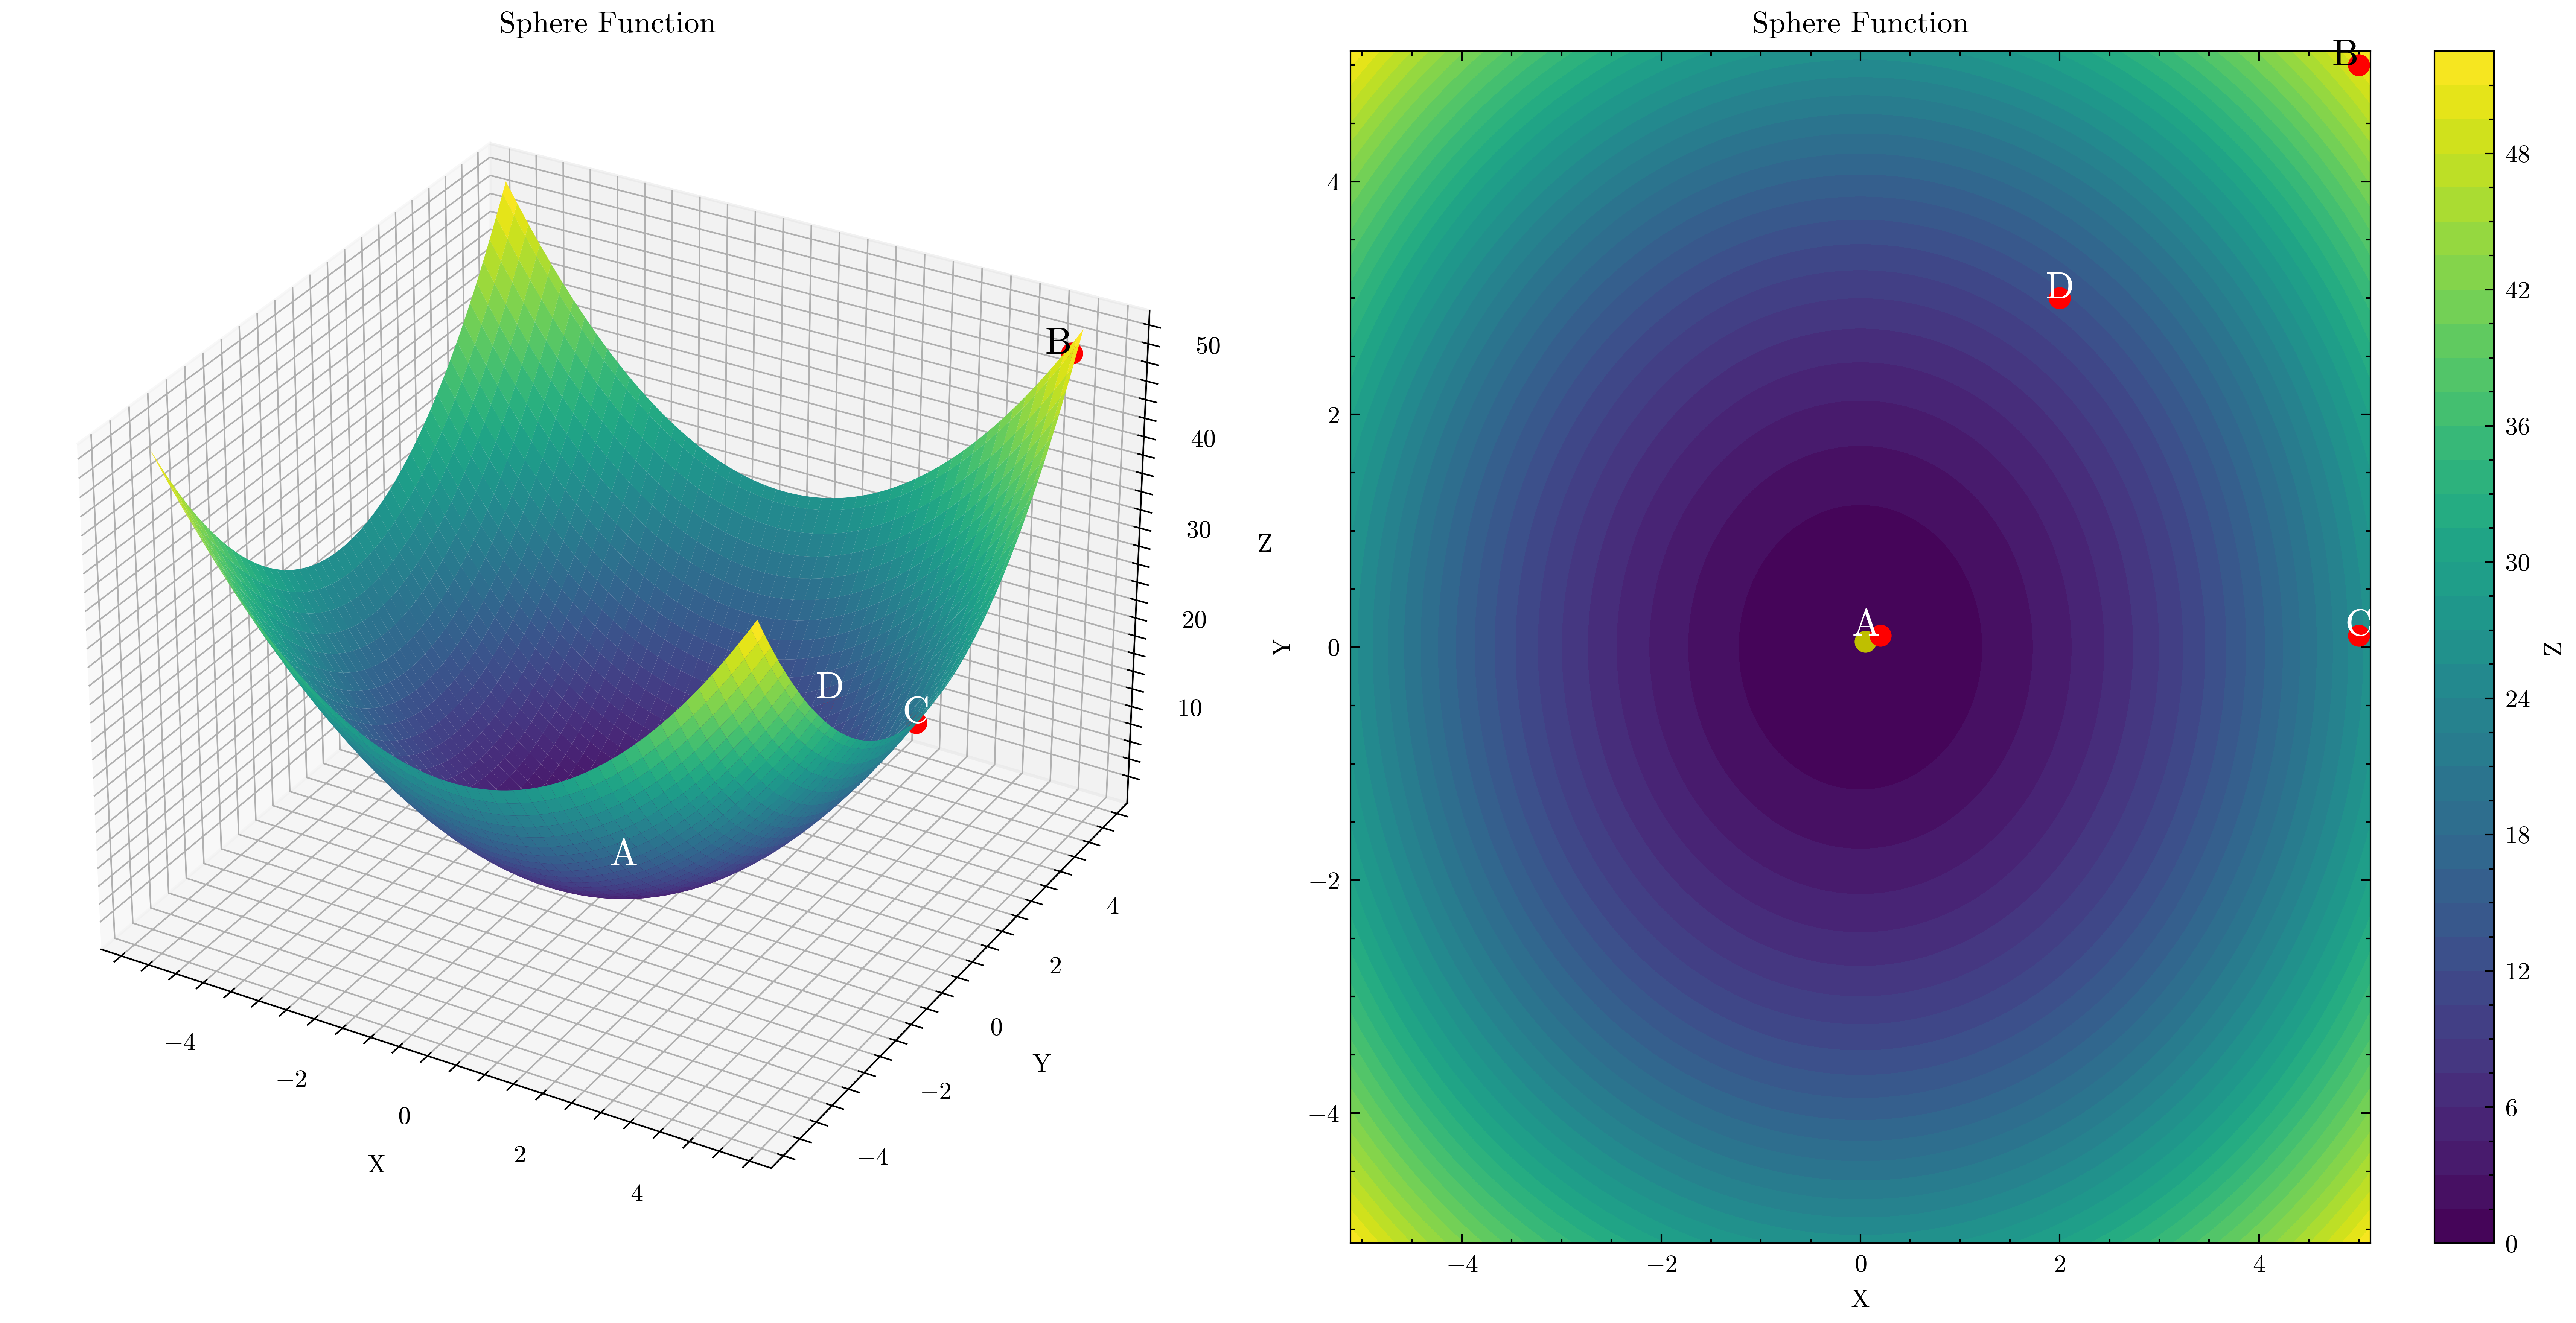

In [134]:
# 3Dプロットと上から見た2次元のSphere関数を描画
# 右端にカラーバーが表示される
plt.style.use(['ieee', 'no-latex'])

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('Sphere Function')

# A, B, C, Dの位置をプロット
ax1.plot(A[0], A[1], sphere_function(A), 'ro', label='A')
ax1.plot(B[0], B[1], sphere_function(B), 'ro', label='B')
ax1.plot(C[0], C[1], sphere_function(C), 'ro', label='C')
ax1.plot(D[0], D[1], sphere_function(D), 'ro', label='D')

# ラベルの表示:A, C, Dは白文字でBは黒文字
ax1.text(A[0], A[1], sphere_function(A), 'A', color='white', fontsize=12, ha='right')
ax1.text(B[0], B[1], sphere_function(B), 'B', color='black', fontsize=12, ha='right')
ax1.text(C[0], C[1], sphere_function(C), 'C', color='white', fontsize=12, ha='center')
ax1.text(D[0], D[1], sphere_function(D), 'D', color='white', fontsize=12, ha='center')


ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
ax2.plot(best_solution[0], best_solution[1], 'yo')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Sphere Function')

# A, B, C, Dの位置をプロット
ax2.plot(A[0], A[1], 'ro', label='A')
ax2.plot(B[0], B[1], 'ro', label='B')
ax2.plot(C[0], C[1], 'ro', label='C')
ax2.plot(D[0], D[1], 'ro', label='D')

# ラベルの表示:A, C, Dは白文字でBは黒文字
ax2.text(A[0], A[1], 'A', color='white', fontsize=12, ha='right')
ax2.text(B[0], B[1], 'B', color='black', fontsize=12, ha='right')
ax2.text(C[0], C[1], 'C', color='white', fontsize=12, ha='center')
ax2.text(D[0], D[1], 'D', color='white', fontsize=12, ha='center')

# カラーバーの表示
cbar = plt.colorbar(ax2.contourf(X, Y, Z, levels=50, cmap='viridis'))
cbar.set_label('Z')

plt.tight_layout()
plt.show()


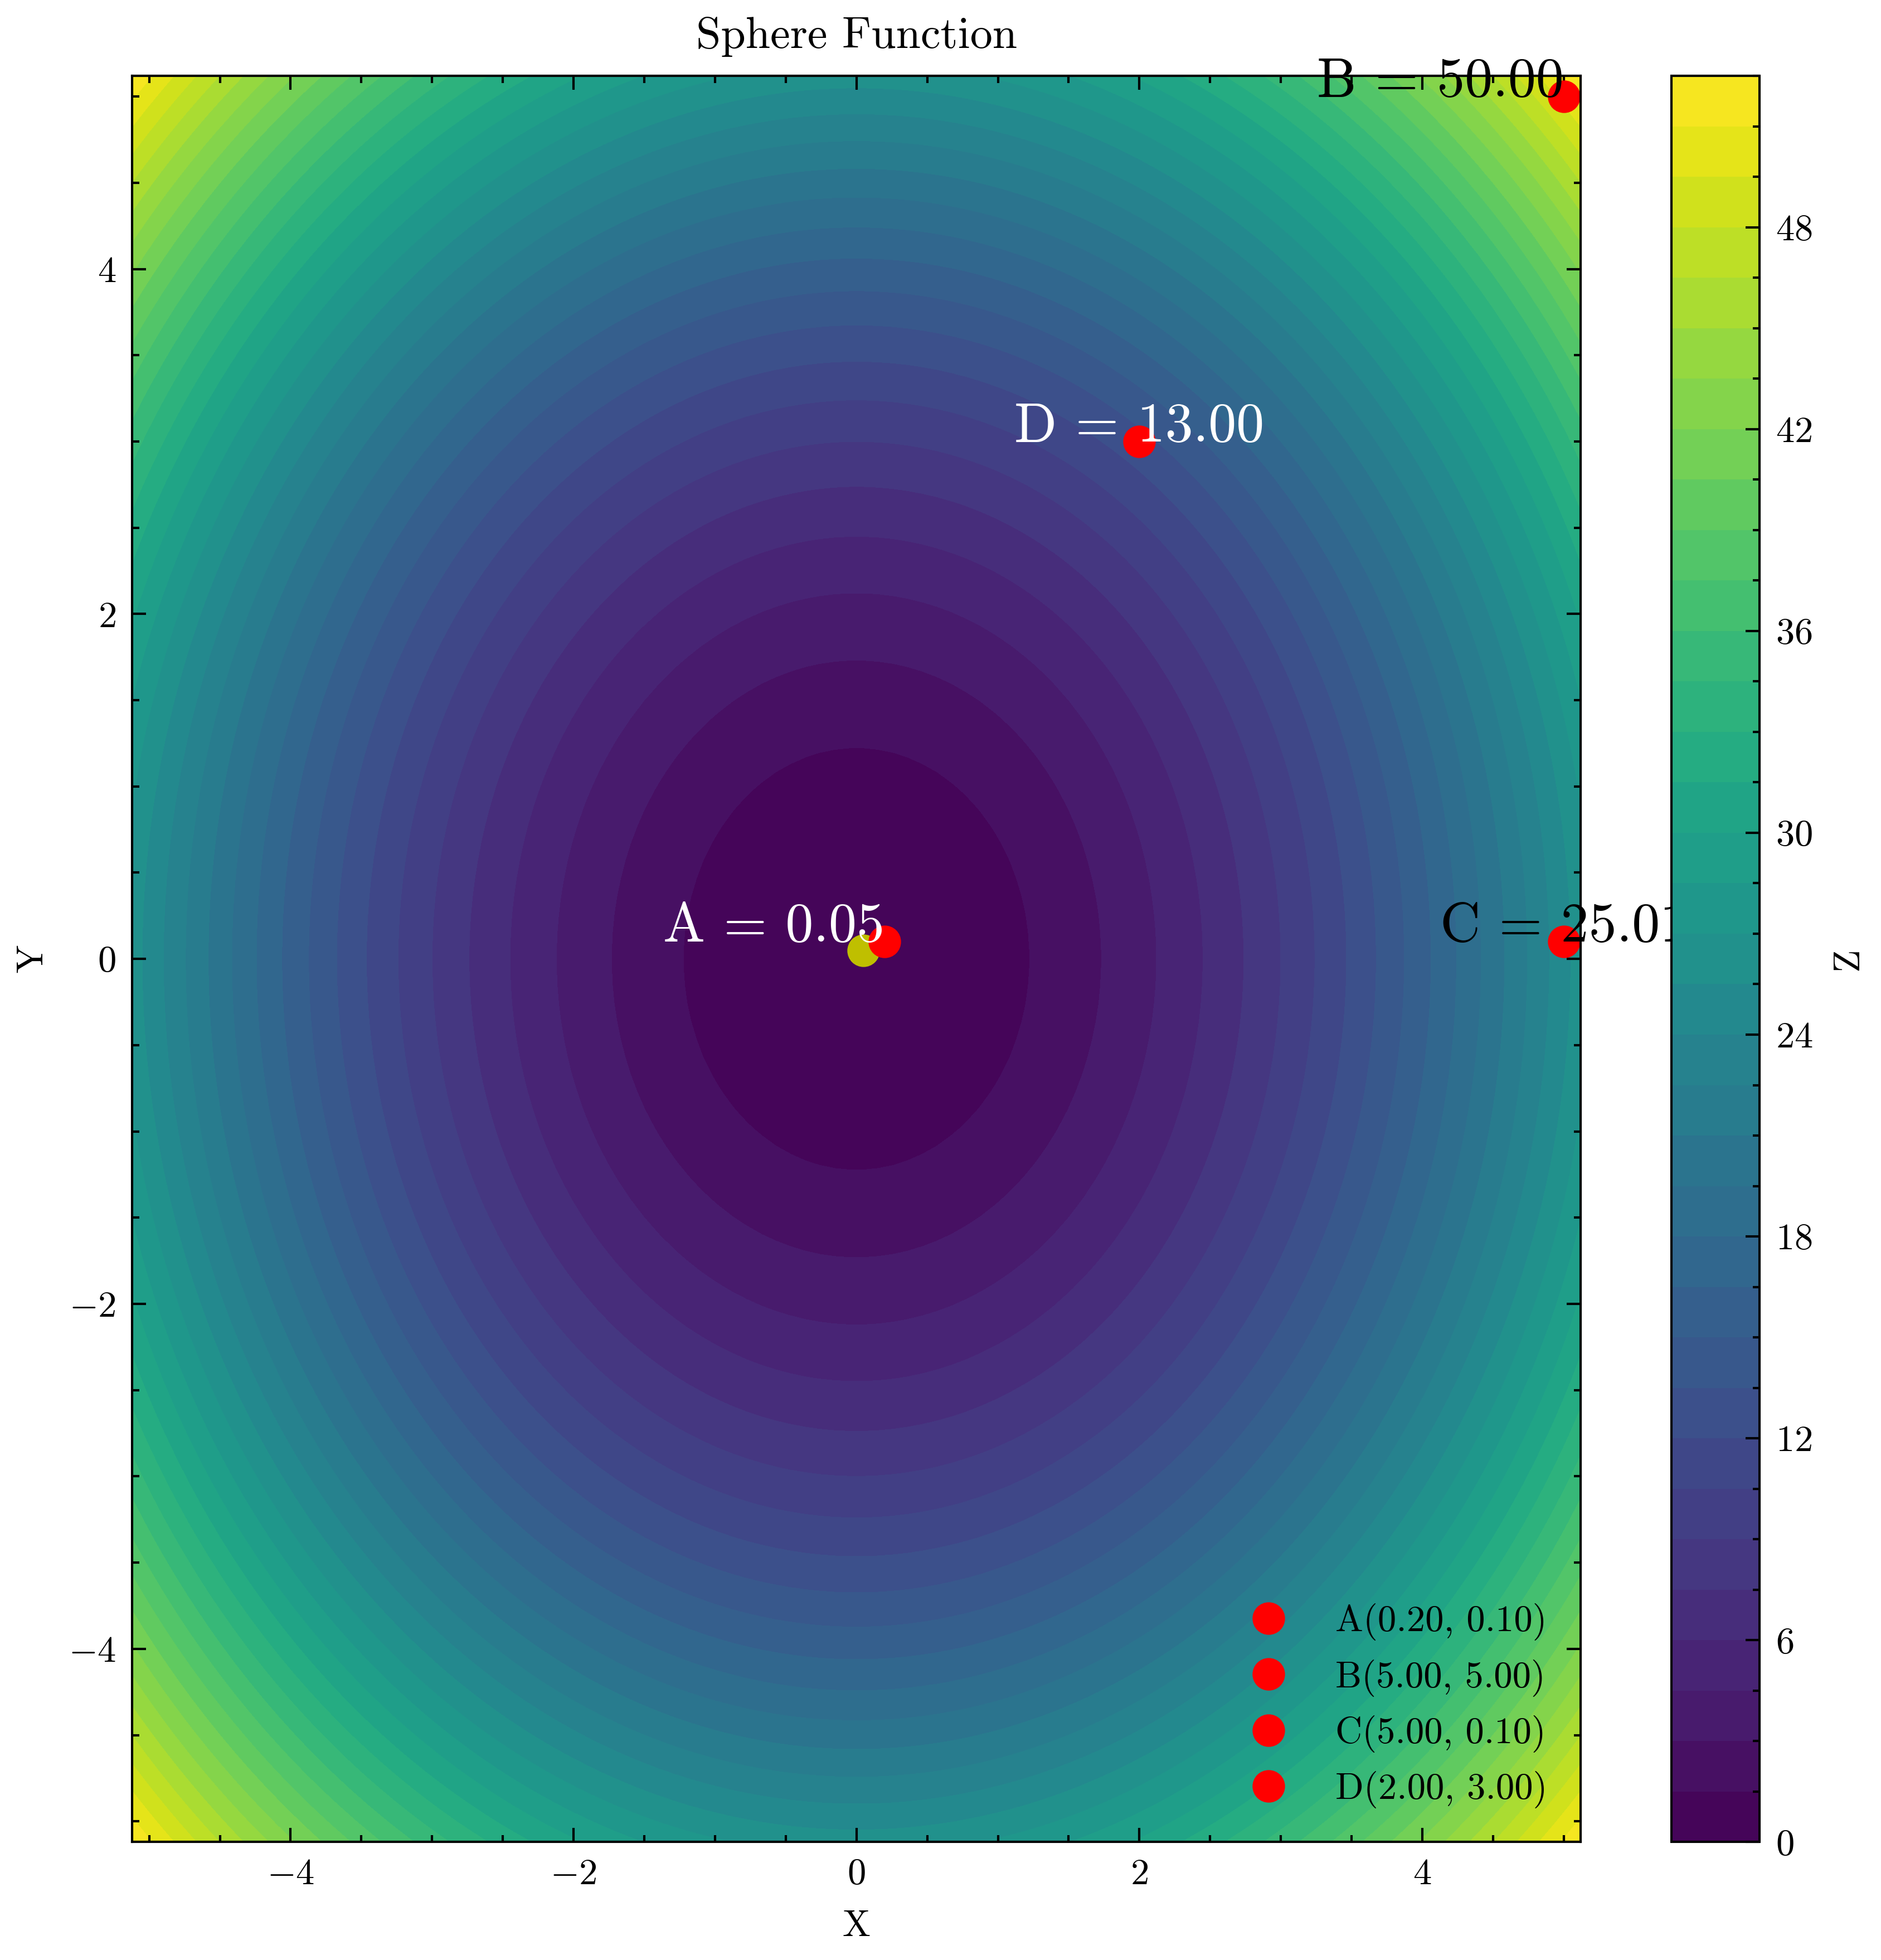

In [141]:
# 3Dプロットと上から見た2次元のSphere関数を描画
# 右端にカラーバーが表示される
plt.style.use(['ieee', 'no-latex'])

fig = plt.figure(figsize=(6, 6))
# ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(111)

x = np.linspace(-5.12, 5.12, 100)
y = np.linspace(-5.12, 5.12, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# ax1.plot_surface(X, Y, Z, cmap='viridis')
# ax1.set_xlabel('X')
# ax1.set_ylabel('Y')
# ax1.set_zlabel('Z')
# ax1.set_title('Sphere Function')

# # A, B, C, Dの位置をプロット
# ax1.plot(A[0], A[1], sphere_function(A), 'ro', label='A')
# ax1.plot(B[0], B[1], sphere_function(B), 'ro', label='B')
# ax1.plot(C[0], C[1], sphere_function(C), 'ro', label='C')
# ax1.plot(D[0], D[1], sphere_function(D), 'ro', label='D')

# # ラベルの表示:A, C, Dは白文字でBは黒文字
# ax1.text(A[0], A[1], sphere_function(A), 'A', color='white', fontsize=12, ha='right')
# ax1.text(B[0], B[1], sphere_function(B), 'B', color='black', fontsize=12, ha='right')
# ax1.text(C[0], C[1], sphere_function(C), 'C', color='white', fontsize=12, ha='center')
# ax1.text(D[0], D[1], sphere_function(D), 'D', color='white', fontsize=12, ha='center')


ax2.contourf(X, Y, Z, levels=50, cmap='viridis')
ax2.plot(best_solution[0], best_solution[1], 'yo')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Sphere Function')

# A, B, C, Dの位置をプロット
ax2.plot(A[0], A[1], 'ro', label=f'A({A[0]:.2f}, {A[1]:.2f})')
ax2.plot(B[0], B[1], 'ro', label=f'B({B[0]:.2f}, {B[1]:.2f})')
ax2.plot(C[0], C[1], 'ro', label=f'C({C[0]:.2f}, {C[1]:.2f})')
ax2.plot(D[0], D[1], 'ro', label=f'D({D[0]:.2f}, {D[1]:.2f})')

# ラベルの表示:A, C, Dは白文字でBは黒文字
ax2.text(A[0], A[1], f'A = {sphere_function(A):.2f}', color='white', fontsize=12, ha='right')
ax2.text(B[0], B[1], f'B = {sphere_function(B):.2f}', color='black', fontsize=12, ha='right')
ax2.text(C[0], C[1], f'C = {sphere_function(C):.2f}', color='black', fontsize=12, ha='center')
ax2.text(D[0], D[1], f'D = {sphere_function(D):.2f}', color='white', fontsize=12, ha='center')

# カラーバーの表示
cbar = plt.colorbar(ax2.contourf(X, Y, Z, levels=50, cmap='viridis'))
cbar.set_label('Z')

# 右下に凡例を表示
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
